In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/survival.csv', index_col = 0)
data.head(4)

,id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
1,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,1521,2
2,1,1,Lev+5FU,1,43,0,0,0,5.0,1,2.0,3,0,1,968,1
3,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,2
4,2,1,Lev+5FU,1,63,0,0,0,1.0,0,2.0,3,0,0,3087,1


In [14]:
import numpy as np

In [20]:
data.groupby(['rx']).agg(['count'])

,id,study,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
rx,,,,,,,,,,,,,,,
Lev,620,620,620,620,620,620,620,608,620,600,620,620,620,620,620
Lev+5FU,608,608,608,608,608,608,608,590,608,596,608,608,608,608,608
Obs,630,630,630,630,630,630,630,624,630,616,630,630,630,630,630


In [55]:
# data.etype.value_counts()

In [3]:
UnwantedVariable = 'id'

In [4]:
treatmentVariable = "rx"
targetVariable = "etype"

In [5]:
data_to_model = data.drop(UnwantedVariable, axis = 1)

In [6]:
from sklearn.model_selection import train_test_split

In [28]:
new_cols = [col for col in data_to_model.columns if col not in [treatmentVariable,targetVariable]]

Wyciągamy podpróbkę Levamisole + Observation

In [51]:
data_to_model =  data_to_model[data_to_model['rx'].isin(['Lev','Obs'])]

In [52]:
data_to_model.shape

(1250, 15)

In [56]:
X = data_to_model.drop([treatmentVariable,targetVariable], axis=1)
y = data_to_model[targetVariable]
treatment = data_to_model[treatmentVariable]

In [57]:
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

### Train uplift tree

In [84]:
uplift_model = UpliftTreeClassifier(
    max_depth = 10, 
    min_samples_leaf = 20, 
    min_samples_treatment = 5, 
    n_reg = 100, 
    evaluationFunction='KL', 
    control_name='Obs'
)

In [85]:
uplift_model.fit(data_to_model[new_cols].values,
                 treatment=data_to_model[treatmentVariable].values,
                 y=data_to_model[targetVariable].values)

In [86]:
# Print uplift tree as a string
result = uplift_tree_string(uplift_model.fitted_uplift_tree, data_to_model.columns)

{'Obs': 1.5, 'Lev': 1.5}


cannot convert float NaN to integer


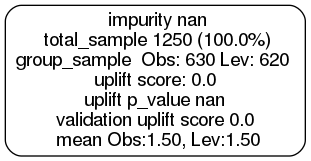

In [87]:
# Plot uplift tree
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree,x_names)
Image(graph.create_png())